# Explore here

In [5]:
from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [12]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

taylor_uri = 'spotify:artist:06HL4z0CvFAxyc27GXpf02'
client_id = 'b2581e7c87d24b369a6816e8da7d8f8b'
client_secret = 'dc22b6b454fc447398f9dfc37cbed7ec'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
results = spotify.artist_top_tracks(taylor_uri)

results = spotify.artist_top_tracks(taylor_uri)

print("Top 10 Tracks by Taylor Swift:")
for index, track in enumerate(results['tracks'][:10], start=1):
    print(f"\nTrack {index}:")
    print("Name:", track['name'])
    print("Popularity:", track['popularity'])
    
    # Convert duration from milliseconds to minutes
    duration_ms = track['duration_ms']
    duration_min = duration_ms / 60000
    print("Duration (minutes):", round(duration_min, 2))

Top 10 Tracks by Taylor Swift:

Track 1:
Name: Cruel Summer
Popularity: 98
Duration (minutes): 2.97

Track 2:
Name: Lover
Popularity: 92
Duration (minutes): 3.69

Track 3:
Name: Anti-Hero
Popularity: 91
Duration (minutes): 3.34

Track 4:
Name: Is It Over Now? (Taylor's Version) (From The Vault)
Popularity: 90
Duration (minutes): 3.82

Track 5:
Name: cardigan
Popularity: 90
Duration (minutes): 3.99

Track 6:
Name: Don’t Blame Me
Popularity: 90
Duration (minutes): 3.94

Track 7:
Name: august
Popularity: 88
Duration (minutes): 4.37

Track 8:
Name: Karma
Popularity: 87
Duration (minutes): 3.41

Track 9:
Name: Blank Space
Popularity: 76
Duration (minutes): 3.86

Track 10:
Name: Love Story (Taylor’s Version)
Popularity: 81
Duration (minutes): 3.93


In [14]:
import pandas as pd
tracks_data = {
    'Name': [track['name'] for track in results['tracks']],
    'Popularity': [track['popularity'] for track in results['tracks']],
    'Duration (ms)': [track['duration_ms'] for track in results['tracks']]
}

# Convert the dictionary into a DataFrame
tracks_df = pd.DataFrame(tracks_data)

# Convert duration from milliseconds to minutes
tracks_df['Duration (minutes)'] = tracks_df['Duration (ms)'] / 60000

# Sort the DataFrame by increasing popularity
tracks_df.sort_values(by='Popularity', ascending=True, inplace=True)

# Display the top 3 songs
top_3_songs = tracks_df.head(3)
print("Top 3 Songs by Taylor Swift (Sorted by Increasing Popularity):\n")
print(top_3_songs[['Name', 'Popularity', 'Duration (minutes)']])

Top 3 Songs by Taylor Swift (Sorted by Increasing Popularity):

                            Name  Popularity  Duration (minutes)
8                    Blank Space          76            3.863767
9  Love Story (Taylor’s Version)          81            3.929433
7                          Karma          87            3.414200


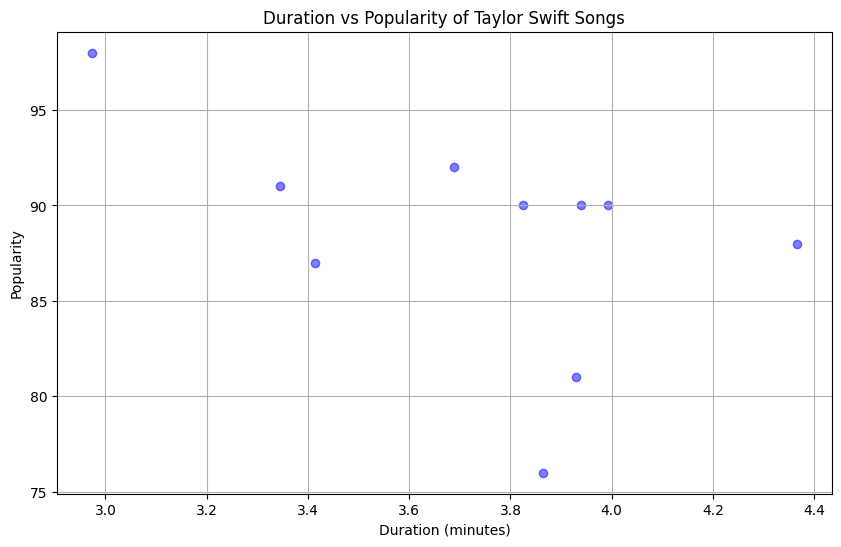

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(tracks_df['Duration (minutes)'], tracks_df['Popularity'], color='blue', alpha=0.5)
plt.title('Duration vs Popularity of Taylor Swift Songs')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()